# Why histograms
As we all know, [Histograms](http://en.wikipedia.org/wiki/Histogram) are an extremely common way to make sense of discrete data. Whether we mean to or not, when we're using histograms, we're usually doing some form of [density estimation](http://en.wikipedia.org/wiki/Density_estimation). That is, although we only have a few discrete data points, we'd really pretend that we have some sort of continuous distribution, and we'd really like to know what that distribution is. For instance, I was recently grading an exam and trying to figure out what the underlying distribution of grades looked like, whether I should curve the exam, and, if so, how I should curve it.

I'll poke at this in an [IPython Notebook](http://ipython.org/notebook.html); if you're doing this in a different environments, you may wish to uncomment out the commented lines so that your namespace is properly polluted. 

Populating the interactive namespace from numpy and matplotlib


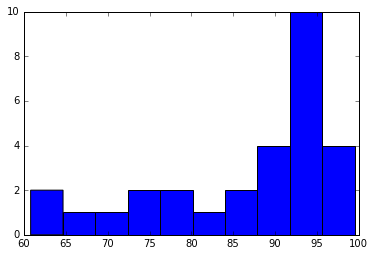

In [1]:
from __future__ import division
%pylab inline

grades = array((93.5,93,60.8,94.5,82,87.5,91.5,99.5,86,93.5,92.5,78,76,69,94.5,89.5,92.8,78,65.5,98,98.5,92.3,95.5,76,91,95,61.4,96,90))
junk = hist(grades)

# Why not histograms?

We can play around with the number of bins, but it's not totally clear what's going on with the left half of the grades.

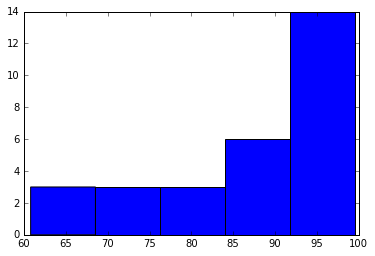

In [2]:
junk = hist(grades,5)

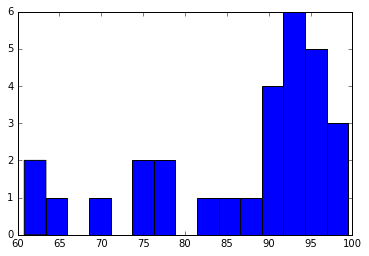

In [3]:
junk = hist(grades,15)

So, maybe the histogram isn't the perfect tool for the job at hand. In fact, there are quite a few well-known problems with histograms. [Shodor](http://www.shodor.org/) has a really nice [histogram activity](http://www.shodor.org/interactivate/activities/Histogram/) that lets you play around with data interactively. Rather than using Java or JavaScript directly, [Jake Vanderplas](http://jakevdp.github.io/) has a great package called [JSAnimation](https://github.com/jakevdp/JSAnimation) that lets us animate things directly in IPython Notebooks. I'll cheat a bit: since all I really need for this is a single slider, I can use JSAnimation to let us interact with data very similarly to the Shodor pages.

In [4]:
from JSAnimation.IPython_display import display_animation, anim_to_html

Before we start, I'll load in a few data sets. If you're interested, you can rerun this notebook with a different data set to see how it affects things. `data_shodor` is the "My Data" set from their histogram activity page, `data_sat` is the average SAT Math data from the same page, `data_tarn` is from Tarn Duong's [fantastic KDE explanation](http://www.mvstat.net/tduong/research/seminars/seminar-2001-05/) (we'll get there), and `simple_data` is just a very simple data set.

In [5]:
data_tarn = array((2.1,2.2,2.3,2.25,2.4,2.61,2.62,3.3,3.4,3.41,3.6,3.8))
data_shodor = array((49,49,45,45,41,38,38,38,40,37,37,34,35,36,35,38,38,32,32,32,37,31,32,31,32,30,30,32,30,30,29,28,29,29,29,30,28,27,29,30,28,27,28,27,27,29,29,29,26,27,25,25,25,25,25,25,25,26,26,27))
data_sat = array((490,499,459,575,575,513,382,525,510,542,368,564,509,530,485,521,495,526,474,500,441,750,495,476,456,440,547,479,501,476,457,444,444,467,482,449,464,501,670,740,590,700,590,450,452,468,472,447,520,506,570,474,532,472,585,466,549,736,654,585,574,621,542,616,547,554,514,592,531,550,507,441,551,450,548,589,549,485,480,545,451,448,487,480,540,470,529,445,460,457,560,495,480,430,644,489,506,660,444,551,583,457,440,470,486,413,470,408,440,596,442,544,528,559,505,450,477,557,446,553,370,533,496,513,403,496,543,533,471,404,439,459,393,470,650,512,445,446,474,449,529,538,450,570,499,375,515,445,571,442,492,456,428,536,515,450,537,490,446,410,526,560,560,540,502,642,590,480,557,468,524,445,479))
simple_data = array((0,5,10))
data = grades

Two of the main problems with histograms are (1) you need to define a bin size (2) you need to decide where the left edge of the bin is. 

## Histogram bin size

Let's look at the effects of bin size on histograms. 

Caveat: the code below is certainly not optimized. Ditto for all of the code in this notebook. I wrote it quickly and at the same time I learned what `FuncAnimation` does. In order to make this read more easily, I've included most of the code at the *end*. If you're running this interactively, **run the cell at the end now!**

Let's start with `getHistBinNumAni`. What does that do? Given a data set, it'll give us an interactive plot. By dragging the slider around, we can make a histogram with anywhere from 1 bin to some max (default: 20) number of bins. No matter how many bins we have, the actual data is shown in blue dots near the bottom. Here's what it looks like for the grades:

In [7]:
ani = getHistBinNumAni(data)
display_animation(ani, default_mode='once')

NameError: name 'getHistBinNumAni' is not defined

So, obviously chosing the number of bins makes a *huge* difference in how we'd interpret the data.

## Where do the histogram bins start?

One of the other big problems with histograms, especially for relatively small data sets, is that you have to choose where the left edge of the first bin goes. Do you center the bin around the first group of points? Do you make the left edge match up with the left-most data point? Let's make some plots to see how that can affect things, because it's a bit easier to understand what I'm going on about that way. We'll make a similar animation with `getHistBinOffsetAni`. As with the previous animation, drag the slider around. This time, we have the same number of bins, but the slider drags around the data relative to the bins (or vice versa, depending on how you think of it).

In [8]:
ani = getHistBinOffsetAni(data)
display_animation(ani, default_mode='once')

NameError: name 'getHistBinOffsetAni' is not defined

# KDE (Kernel Density Estimation) to the rescue!

[Kernel density estimation](http://en.wikipedia.org/wiki/Kernel_density_estimation) is my favorite alternative to histograms. Tarn Duong has [fantastic KDE explanation](http://www.mvstat.net/tduong/research/seminars/seminar-2001-05/), which is well worth reading. The basic idea is that, if you're looking at our simple dataset (`simple_data = array((0,5,10)`), you might choose to represent each point as a rectangle:


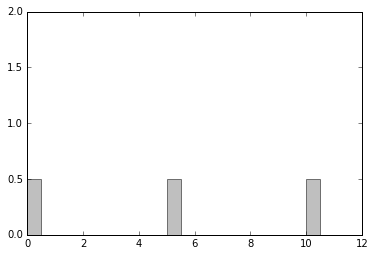

In [10]:
bar(simple_data,ones_like(simple_data)*0.5,width=0.5,facecolor='grey',alpha=0.5)
junk = ylim(0, 2.0)

not so interesting so far, but what do we do when the rectangles get wide enough that they start to overlap? Instead of just letting them run over each other like

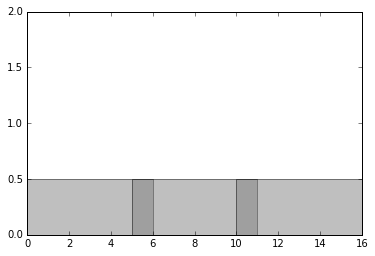

In [11]:
bar(simple_data,ones_like(simple_data)*0.5,width=6,facecolor='grey',alpha=0.5)
junk = ylim(0, 2.0)

and instead of coloring the overlap regions darker grey, we *add* the rectangles together. So, since each of the rectangles has height 0.5 in the above example, the dark grey regions should really have height 1.0. This idea is called "kernel density estimation" (KDE), and the rectangle that we're using is called the "kernel". If we wanted to draw a different shape at each point, we'd do so by specifying a different kernel (perhaps a bell curve, or a triangle). 

KDE, rectangular kernel
-----------------------

Now let's try KDE with a rectangular kernel. This time, using `getKdeRectAni`, you get a slider controls the width of the kernel.

In [12]:
ani = getKdeRectAni(simple_data)
display_animation(ani, default_mode='once')

NameError: name 'getKdeRectAni' is not defined

play with the slider, and note what happens when you make it big enough that the rectangles start to overlap. By tuning the width of the rectangles, we can tune how finely or coarsely we're looking at the data. It's not so powerful with three data points, but check it out with the grades from above:

In [ ]:
ani = getKdeRectAni(data)
display_animation(ani, default_mode='once')

In my view, there's a sweet spot right around 1/8 or 1/9 of the way across the slider where there are three distinct peaks. It looks very much like a trimodal distribution to me. So far, this isn't totally automatic; we have to pick the width of our kernel, but it's obvoius that KDE can give us a much better view of the underlying data than histograms!

KDE, Gaussian kernel
--------------------


As mentioned above, we can use a different kernel. One of the most common kernels to use is a [Gaussian](http://en.wikipedia.org/wiki/Gaussian_function). Using `getKdeGaussianAni`:

 Again, the slider controls kernel width.

In [ ]:
ani = getKdeGaussianAni(data)
display_animation(ani, default_mode='once')

This gives us a really nice picture of the data. Play around with the slider and see what you think.

## Kernel width

Not only does KDE give us a better picture than histograms, but there turn out to be actual answers to the question of "how wide should my kernel be?" You can see, for instance, that making the kernel too narrow doesn't provide much more information than the raw data, while making it too large oversmooths the data, making it mostly look like a single kernel with some bits on the sides.

[Daniel Smith](http://partiallattice.wordpress.com/) has a really nice [KDE module](https://github.com/Daniel-B-Smith/KDE-for-SciPy) that chooses an optimal bandwidth and can be used with [SciPy](http://www.scipy.org/) (scipy does have [its own](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html) KDE module, but I've found Daniel's to be quite robust).

# Other data sets

I highly recommend just playing around with other data sets using the above code. I was interested in playing around with income data, so I show how to grab that data from the IRS website below and play around a bit without comment. Enjoy!

##Income data

Let's grab the income data from [The IRS](http://www.irs.gov/uac/SOI-Tax-Stats---Free-County-Income-Data-Downloads) and make some plots.



In [ ]:
import urllib
f = urllib.urlopen("http://www.irs.gov/file_source/pub/irs-soi/09incicsv.csv")
#"State_Code","County_Code","State_Abbrv","County_Name",   "Return_Num","Exmpt_Num","AGI","Wages_Salaries","Dividends","Interest"
irs2009 = loadtxt(f,delimiter=',',skiprows=1,usecols=(4,5,6,7,8,9))
agi2009 = irs2009[:,2]


Now try things like

In [ ]:
ani = getHistBinNumAni(agi2009)
display_animation(ani, default_mode='once')

Whoops, that's hard to make sense of. Let's use logs

In [ ]:
la2009 = log(agi2009)
la2009 = la2009[-isnan(la2009)]

In [ ]:
ani = getHistBinNumAni(la2009)
display_animation(ani, default_mode='once')

In [ ]:
ani = getKdeRectAni(la2009)
display_animation(ani, default_mode='once')

In [ ]:
ani = getKdeGaussianAni(la2009)
display_animation(ani,default_mode='once')

In order to make this read more easily, I've put the bulk of the code below. You'll have to run it before the previous cells.

In [ ]:
#!/usr/bin/env python

from numpy import histogram as nphistogram
#from numpy import array, linspace, zeros, ones, ones_like
#import numpy as np
#import matplotlib.pyplot as plt
#from matplotlib.pyplot import figure, hist, plot, ion, axes, title
from JSAnimation.IPython_display import display_animation, anim_to_html

from matplotlib import animation as animation


def getHistBinNumAni(data,totalframes=None,showpts=True):
    #ion()
    if totalframes is None:
        totalframes = min(len(data)-1,100)
    fig = figure()
    ax = fig.gca()

    n, bins, patches = hist(data, totalframes, normed=1, facecolor='green', alpha=0.0)
    if showpts:
        junk = plot(data,0.2*ones_like(data),'bo')
    def animate(i):
        n, bins = nphistogram(data, i+1, normed=False)
        #print n
        ax.set_ylim(0,1.1*n.max())
        for j in range(len(n)):
            rect,h = patches[j],n[j]
            #print h.max()
            x = bins[j]
            w = bins[j+1] - x
            rect.set_height(h)
            rect.set_x(x)
            rect.set_width(w)
            rect.set_alpha(0.75)
        #fig.canvas.draw()
    
    ani = animation.FuncAnimation(fig, animate, totalframes, repeat=False)
    return ani

def getHistBinOffsetAni(data,nbins=20,showpts=True):
    offsets = linspace(-0.5,0.5,50)
    totalframes = len(offsets)
    fig = figure()
    ax = fig.gca()

    n, _bins, patches = hist(data, nbins, normed=1, facecolor='green', alpha=0.0)
    if showpts:
        junk = plot(data,0.2*ones_like(data),'bo')
    # Obnoxious: find max number in a bin ever
    nmax = 1
    for i in range(totalframes):
        dx = (data.max() - data.min())/nbins
        _bins = linspace(data.min() - dx + offsets[i]*dx, data.max()+dx + offsets[i]*dx,len(data)+1)
        n, bins = nphistogram(data, bins=_bins, normed=False)
        nmax = max(nmax,n.max())
                               
    def animate(i):
        dx = (data.max() - data.min())/nbins
        # bins go from min - dx to max + dx, then offset.
        _bins = linspace(data.min() - dx + offsets[i]*dx, data.max()+dx + offsets[i]*dx,nbins)
        n, bins = nphistogram(data, bins = _bins, normed=False)
        ax.set_ylim(0,1.1*nmax)
        #ax.set_xlim(data.min()-dx,data.max()+dx)
        binwidth = bins[1] - bins[0]
        ax.set_xlim(bins[0]-binwidth,bins[-1] + binwidth)

        for j in range(len(n)):
            #continue
            rect,h = patches[j],n[j]
            #print h.max()
            x = bins[j]
            w = bins[j+1] - x
            rect.set_height(h)
            rect.set_x(x)
            rect.set_width(w)
            rect.set_alpha(0.75)
        fig.canvas.draw()    
    ani = animation.FuncAnimation(fig, animate, totalframes, repeat=False)
    return ani
#!/usr/bin/env python

from numpy import sqrt, pi, exp

def getKdeGaussianAni(data,totalframes=100, showpts=True):
    fig = figure()
    
    # Let's say 10000 points for the whole thing
    width = data.max() - data.min()
    left, right = data.min(), data.min() + (width)
    left, right = left - (totalframes/100)*width, right + (totalframes/100)*width
    
    ax = axes(xlim=(left,right),ylim=(-0.1,2))
    line, = ax.plot([], [], lw=2)
    if showpts:
        junk = plot(data,ones_like(data)*0.1,'go')

    
    numpts = 10000
    x = linspace(left,right,numpts)
    
    dx = (right-left)/(numpts-1)
    
    def init():
        line.set_data([], [])
        return line,
    
    def gaussian(x,sigma,mu):
        # Why isn't this defined somewhere?! It must be!
        return (1/sqrt(2*pi*sigma**2)) *  exp(-((x-mu)**2)/(2*sigma**2))
    
    def animate(i):
        y = zeros(10000)
        kernelwidth = .02*width*(i+1)
        kernelpts = int(kernelwidth/dx)
        kernel = gaussian(linspace(-3,3,kernelpts),1,0)
        #kernel = ones(kernelpts)
        for d in data:
            center = d - left
            centerpts = int(center/dx)
            bottom = centerpts - int(kernelpts/2)
            top = centerpts+int(kernelpts/2)
            if top - bottom < kernelpts: top = top + 1
            if top - bottom > kernelpts: top = top - 1
            y[bottom:top] += kernel
        ax.set_xlim(x[where(y>0)[0][0]],x[where(y>0)[0][-1]])
        line.set_data(x,y)
        ax.set_ylim(min(0,y.min()),1.1*y.max())
        #title('ymin %s ymax %s'%(y.min(),y.max()))

    
        #sleep(0.1)
        return line,
    ani = animation.FuncAnimation(fig, animate, init_func=init,
                                  frames=totalframes, repeat=False)
    return ani
#FACTOR ME for rect and gaussian
def getKdeRectAni(data,totalframes=100,showpts=True):
    #ion()
    totalframes = 100
    fig = figure()
    
    # Let's say 10000 points for the whole thing
    width = data.max() - data.min()
    left, right = data.min(), data.min() + (width)
    left, right = left - (totalframes/100)*width, right + (totalframes/100)*width
    
    ax = axes(xlim=(left,right),ylim=(-0.1,2))
    line, = ax.plot([], [], lw=2)
    
    numpts = 10000
    x = linspace(left,right,numpts)
    
    dx = (right-left)/(numpts-1)
    
    def init():
        line.set_data([], [])
        return line,

    if showpts:
        junk = plot(data,0.2*ones_like(data),'bo')
    
    def animate(i):
        y = zeros(10000)
        kernelwidth = .02*width*(i+1)
        kernelpts = int(kernelwidth/dx)
        kernel = ones(kernelpts)
        for d in data:
            center = d - left
            centerpts = int(center/dx)
            bottom = centerpts - int(kernelpts/2)
            top = centerpts+int(kernelpts/2)
            if top - bottom < kernelpts: top = top + 1
            if top - bottom > kernelpts: top = top - 1
            y[bottom:top] += kernel
        line.set_data(x,y)
        ax.set_ylim(0,1.1*y.max())
        ax.set_xlim(x[where(y>0)[0][0]],x[where(y>0)[0][-1]])
    
        #sleep(0.1)
        return line,
    ani = animation.FuncAnimation(fig, animate, init_func=init,
                                  frames=totalframes, repeat=False)
    return ani


And that's it. Cheers!